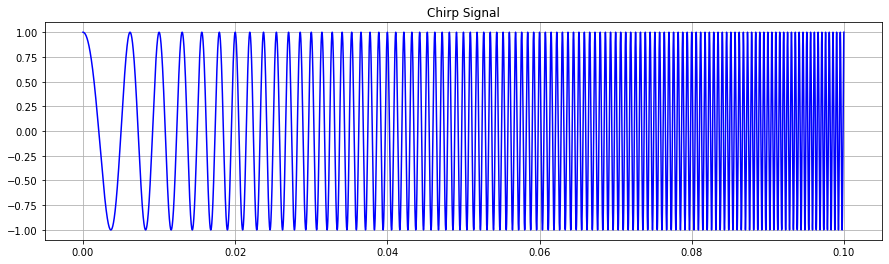

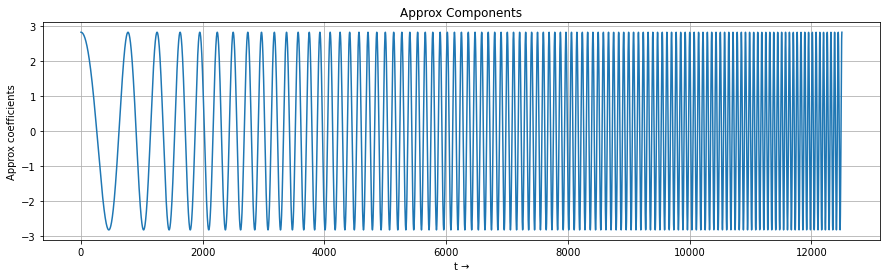

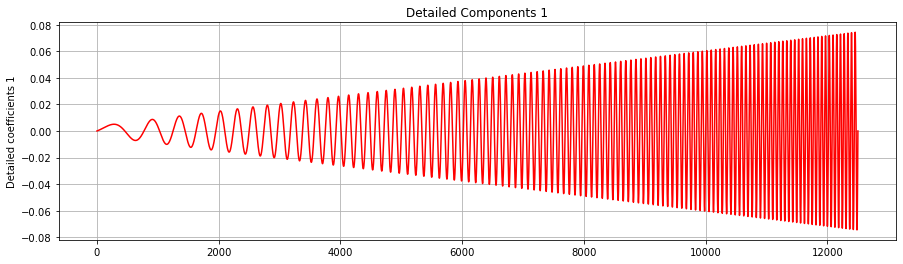

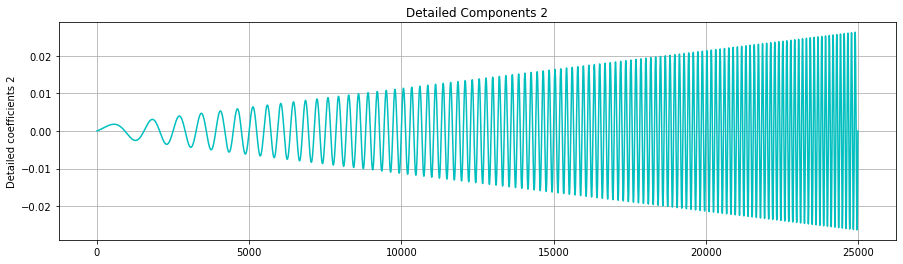

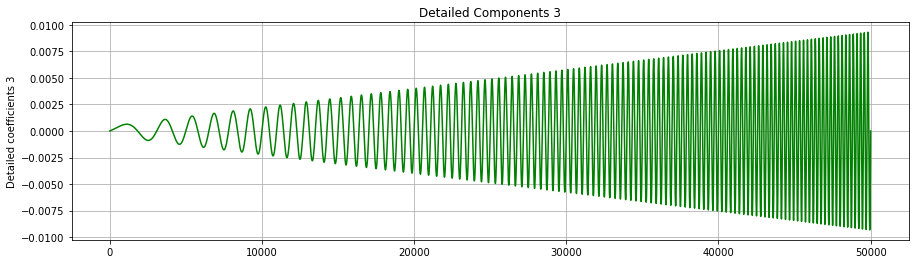

In [23]:
#------------------------------CHIRP SIGNAL PLOTTING AND FINDING APPROXIMATE COEFFICIENTS AND DETAILED COMPONENTS-----#
import numpy as np
import matplotlib.pyplot as plt
from pywt import wavedec
t=np.arange(0,0.1,1/1000000)
tmax=0.1
x=np.empty([len(t)])
for i in range(len(t)):
    x[i]=np.cos(2*np.pi*(10000*t[i]+100)*t[i])
#x=np.cos(2*np.pi*fi*t)
fig=1
plt.figure(fig,figsize=(15,4))
plt.plot(t,x,color='b')
plt.title('Chirp Signal')
plt.grid('true')
fig+=1
approx_det,coeff_det1,coeff_det2,coeff_det3=wavedec(x,'db1',level=3)
plt.figure(fig,figsize=(15,4))
plt.plot(approx_det)
plt.grid('true')
plt.title('Approx Components')
plt.xlabel('t →')
plt.ylabel('Approx coefficients')
fig+=1
plt.figure(fig,figsize=(15,4))
plt.plot(coeff_det1,color='r')
plt.title('Detailed Components 1')
plt.ylabel('Detailed coefficients 1')
plt.grid('true')
fig+=1
plt.figure(fig,figsize=(15,4))
plt.plot(coeff_det2,color='c')
plt.title('Detailed Components 2')
plt.ylabel('Detailed coefficients 2')
plt.grid('true')
fig+=1
plt.figure(fig,figsize=(15,4))
plt.plot(coeff_det3,color='g')
plt.title('Detailed Components 3')
plt.ylabel('Detailed coefficients 3')
plt.grid('true')
fig+=1

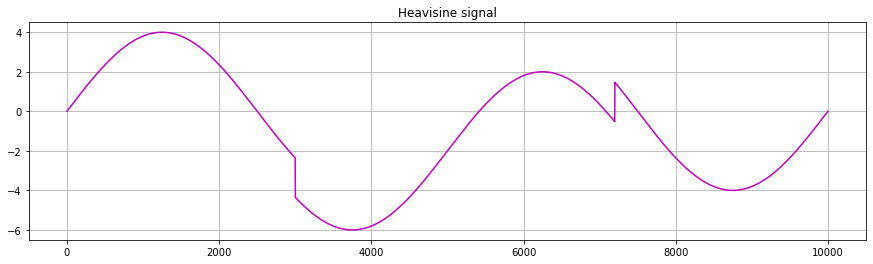

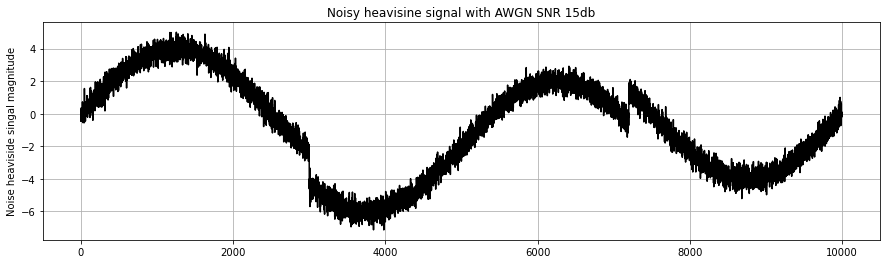

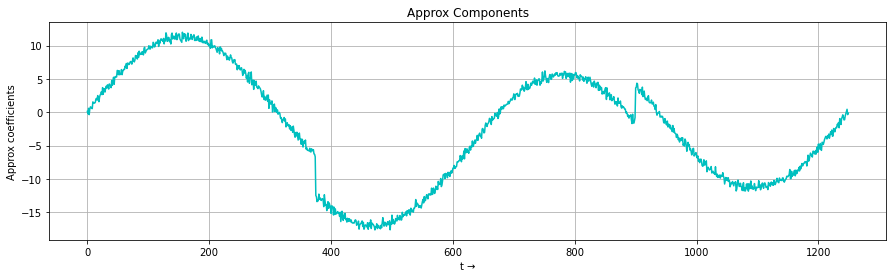

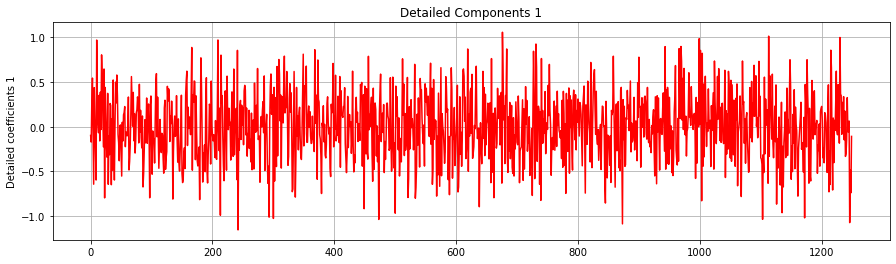

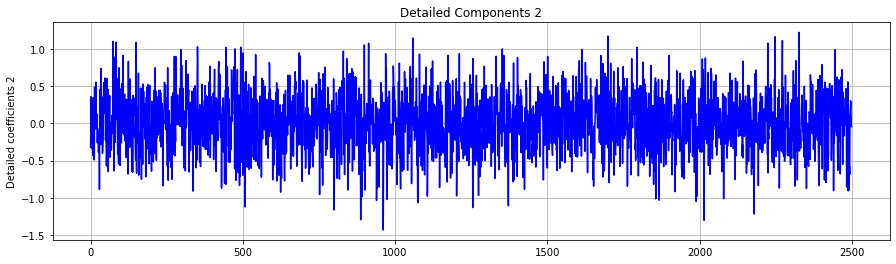

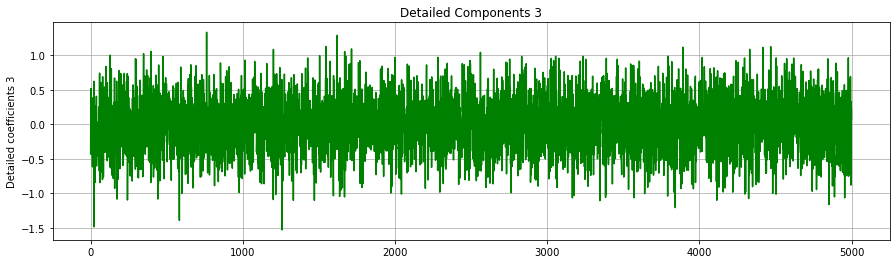

In [24]:
#------------------------------------HEAVISINE SIGNAL AND ADDING AWGN 15DB AND FINDING APPROXIMATE COEFFICIENT--------#
from pywt.data import demo_signal
from numpy.random import standard_normal
def AWGN(s,SNRdb):
    SNR=10**(SNRdb/10)
    P=0
    for i in s:
        P+=float(i**2)
    P=P/len(s)
    N=P/SNR
    noise=standard_normal(len(s))
    noise=np.sqrt(N/2)*noise
    r=s+noise
    return(r,noise)
snr_db=15
heavisine=demo_signal(name='HeaviSine',n=10000)
noisy,noise=AWGN(heavisine,snr_db)
approx_det,coeff_det1,coeff_det2,coeff_det3=wavedec(noisy,'db1',level=3)
plt.figure(fig,figsize=(15,4))
plt.plot(heavisine,color='m')
plt.title('Heavisine signal')
plt.grid('true')
fig+=1
plt.figure(fig,figsize=(15,4))
plt.plot(noisy,color='k')
plt.title('Noisy heavisine signal with AWGN SNR 15db')
plt.ylabel('Noise heaviside singal magnitude')
plt.grid('true')
fig+=1
plt.figure(fig,figsize=(15,4))
plt.plot(approx_det,color='c')
plt.title('Approx Components')
plt.xlabel('t →')
plt.ylabel('Approx coefficients')
plt.grid('true')
fig+=1
plt.figure(fig,figsize=(15,4))
plt.plot(coeff_det1,color='r')
plt.title('Detailed Components 1')
plt.ylabel('Detailed coefficients 1')
plt.grid('true')
fig+=1
plt.figure(fig,figsize=(15,4))
plt.plot(coeff_det2,color='b')
plt.title('Detailed Components 2')
plt.ylabel('Detailed coefficients 2')
plt.grid('true')
fig+=1
plt.figure(fig,figsize=(15,4))
plt.plot(coeff_det3,color='g')
plt.grid('true')
plt.title('Detailed Components 3')
plt.ylabel('Detailed coefficients 3')
fig+=1

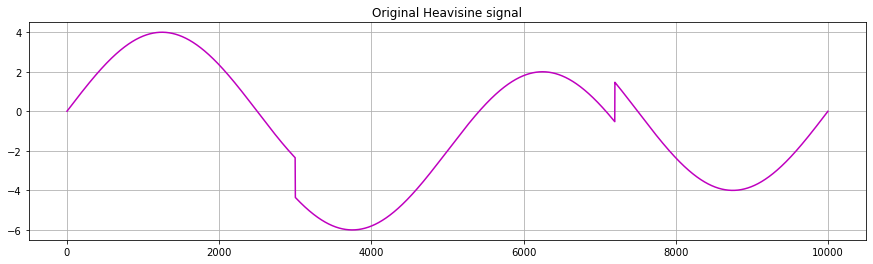

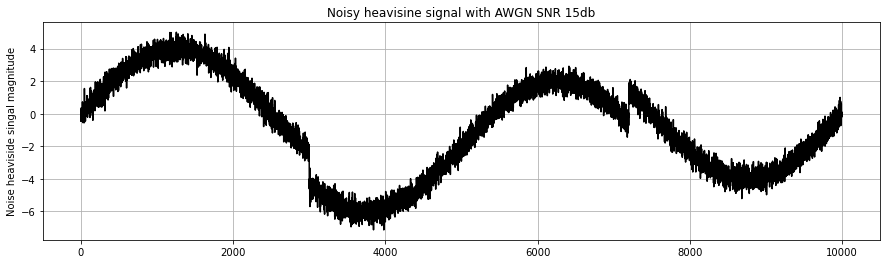

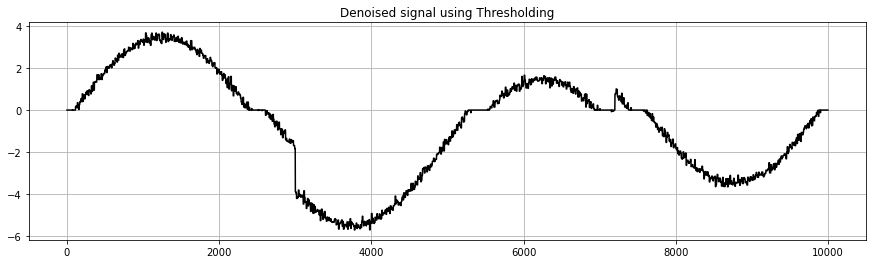

In [25]:
#---------------------------------HEAVISINE SIGNAL NOISING AND DENOISING-----------------------------#
from pywt import waverec
def signum(x):
 return 1*(x>0)+0*(x==0)-1*(x<0) 
def soft_threshold(coff,threshol_val):
  return np.array([(signum(i)*(abs(i)-threshol_val))*(abs(i)>=threshol_val)+0*(abs(i)<threshol_val) for i in coff])
out1=soft_threshold(approx_det,1.5)
out2=soft_threshold(coeff_det1,1.5)
out3=soft_threshold(coeff_det2,1.5)
out4=soft_threshold(coeff_det3,1.5)
out_coff=out1,out2,out3,out4
output= waverec(out_coff, 'db1')
plt.figure(fig,figsize=(15,4))
plt.plot(heavisine,color='m')
plt.title('Original Heavisine signal')
plt.grid('true')
fig+=1
plt.figure(fig,figsize=(15,4))
plt.plot(noisy,color='k')
plt.title('Noisy heavisine signal with AWGN SNR 15db')
plt.ylabel('Noise heaviside singal magnitude')
plt.grid('true')
fig+=1
plt.figure(fig,figsize=(15,4))
plt.plot(output,color='k')
plt.title('Denoised signal using Thresholding')
plt.grid('true')
fig=fig+1

In [26]:
#----------------------------------------IMPORTING THE DATASET AND SMOOOTHING IT OUT USING THRESHOLDING----------------#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
df = pd.read_csv("acc_00001.csv")
x=pd.DataFrame.to_numpy(df.iloc[:,[4]])
y=pd.DataFrame.to_numpy(df.iloc[:,[5]])
z=pd.DataFrame.to_numpy(df.iloc[:,[3]])
approx_det_xz,coeff_det1_xz,coeff_det2_xz,coeff_det3_xz=wavedec(x,'db1',level=3)
out1_xz=soft_threshold(approx_det_xz,1.5)
out2_xz=soft_threshold(coeff_det1_xz,1.5)
out3_xz=soft_threshold(coeff_det2_xz,1.5)
out4_xz=soft_threshold(coeff_det3_xz,1.5)
out_coff_xz=out1_xz,out2_xz,out3_xz,out4_xz
output_xz= waverec(out_coff_xz, 'db1')
approx_det_yz,coeff_det1_yz,coeff_det2_yz,coeff_det3_yz=wavedec(y,'db1',level=3)
out1_yz=soft_threshold(approx_det_yz,1.5)
out2_yz=soft_threshold(coeff_det1_yz,1.5)
out3_yz=soft_threshold(coeff_det2_yz,1.5)
out4_yz=soft_threshold(coeff_det3_yz,1.5)
out_coff_yz=out1_yz,out2_yz,out3_yz,out4_yz
output_yz= waverec(out_coff_yz, 'db1')
print('Done')

E:\anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 3 is too high: all coefficients will experience boundary effects.
  warnings.warn(


Done


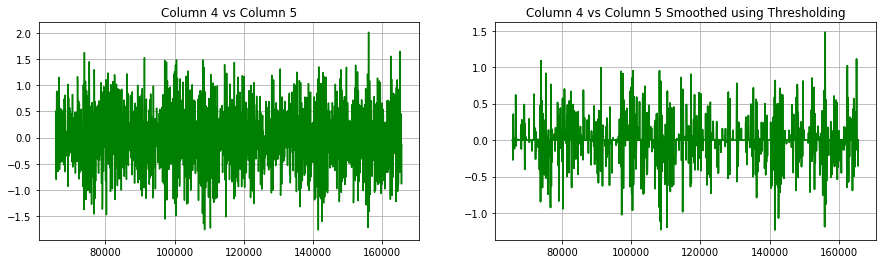

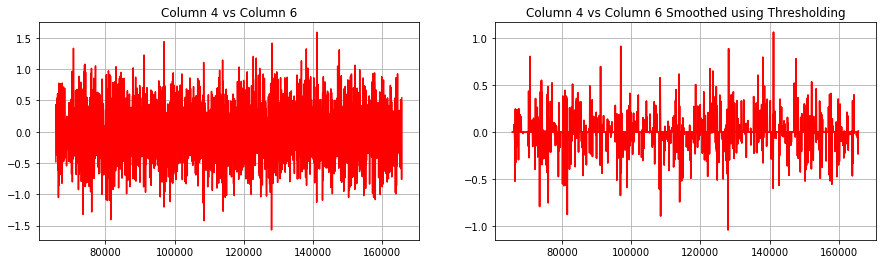

In [27]:
#-----------------------------plotting of columns of the dataset and smoothing it using thresholding----------------------#
fig+=1
plt.figure(fig,figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(z,x,color='g')
plt.title('Column 4 vs Column 5')
plt.grid('true')
plt.subplot(1,2,2)
plt.title('Column 4 vs Column 5 Smoothed using Thresholding')
plt.plot(z,output_xz,color='g')
plt.grid('true')
fig+=1
plt.figure(fig,figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Column 4 vs Column 6')
plt.plot(z,y,color='r')
plt.grid('true')
plt.subplot(1,2,2)
plt.title('Column 4 vs Column 6 Smoothed using Thresholding')
plt.plot(z,output_yz,color='r')
plt.grid('true')

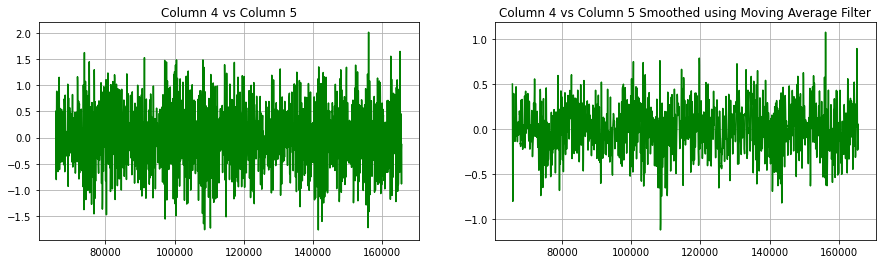

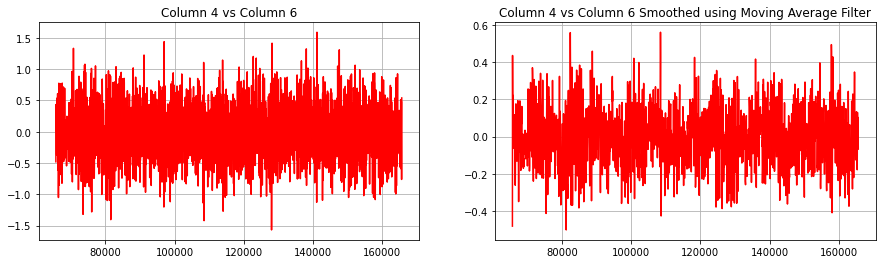

In [28]:
#-----------------------------plotting of columns of the dataset and smoothing it using MOVING AVERAGE FILTER----------------------#
def MVF(x,n):
    y=np.empty([len(x)])
    for i in range(len(x)):
        y[i]=0
        if i<n:
            y[i]=x[i]
        else:
            for j in range(1,n+1):
                y[i]+=x[i-j]
            y[i]=y[i]/n
    return y
x_MVF=MVF(x,5)
y_MVF=MVF(y,5)
fig+=1
plt.figure(fig,figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(z,x,color='g')
plt.title('Column 4 vs Column 5')
plt.grid('true')
plt.subplot(1,2,2)
plt.title('Column 4 vs Column 5 Smoothed using Moving Average Filter')
plt.plot(z,x_MVF,color='g')
plt.grid('true')
fig+=1
plt.figure(fig,figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Column 4 vs Column 6')
plt.plot(z,y,color='r')
plt.grid('true')
plt.subplot(1,2,2)
plt.title('Column 4 vs Column 6 Smoothed using Moving Average Filter')
plt.plot(z,y_MVF,color='r')
plt.grid('true')